In [2]:
!pip install mplsoccer

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-cp37-none-any.whl size=62948 sha256=be1bcf92fe66d6866618135353413f9897e84278c8dc5b2f6daf63ae024a499a
  Stored in directory: /root/.cache/pip/wheels/1e/89/34/a6679a2c0b05f035f97ccc671f73139d2859b7612995416d2a
Successfully built mplsoccer


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [4]:
from google.colab import files
f = files.upload()

Saving messibetis - Sheet1.csv to messibetis - Sheet1.csv


In [6]:
df = pd.read_csv('messibetis - Sheet1.csv')

In [8]:
#convert the data to match the mplsoccer statsbomb pitch
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8

In [9]:
df

,Unnamed: 0,player,minutes,second,x,y,type,outcome,endX,endY
0,NaN,messi,45,0,72.00,32.00,Pass,Successful,57.60,27.52
1,NaN,messi,45,25,90.72,30.72,Pass,Successful,108.00,53.12
2,NaN,messi,46,4,106.56,37.12,Pass,Successful,102.24,41.60
3,NaN,messi,46,7,109.44,43.52,Pass,Successful,136.80,49.92
4,NaN,messi,46,55,144.00,0.64,Pass,Unsuccessful,138.24,24.32
5,NaN,messi,47,42,105.12,16.00,Pass,Successful,100.80,34.56
6,NaN,messi,49,47,108.00,27.52,Pass,Unsuccessful,118.08,24.32
7,NaN,messi,50,10,113.76,19.84,Pass,Successful,125.28,15.36
8,NaN,messi,50,17,118.08,33.28,Pass,Successful,133.92,43.52
9,NaN,messi,50,24,141.12,39.68,Pass,Unsuccessful,141.12,39.04


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


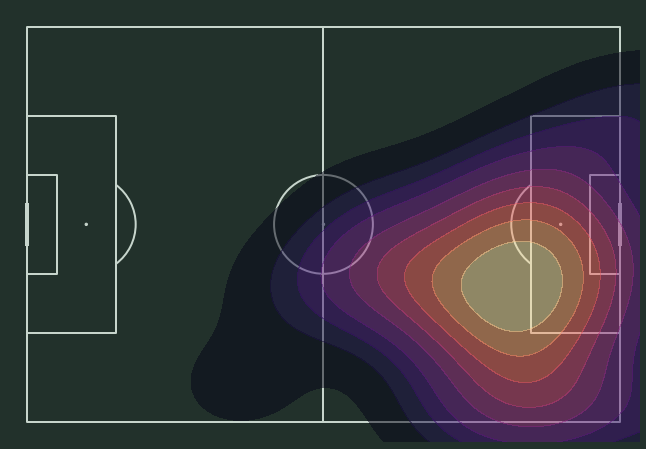

In [10]:

fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#Create the heatmap
kde = sns.kdeplot(
        df['x'],
        df['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'magma'
)